In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/aloksingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# No of rows and columns

df.shape

(6234, 12)

In [5]:
# information about the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


There is null value in dataset

In [6]:
#Checking null value

df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#Percentage of null value

for column in df.columns:
    missing_percentage = df[column].isna().sum() / len(df) * 100
    print(f"{column} : {missing_percentage:.2f}%")
    

show_id : 0.00%
type : 0.00%
title : 0.00%
director : 31.58%
cast : 9.14%
country : 7.64%
date_added : 0.18%
release_year : 0.00%
rating : 0.16%
duration : 0.00%
listed_in : 0.00%
description : 0.00%


there is more then 10% missing values we cannot drop it 


# Handling Missing Value

In [8]:
df['director'] = df['director'].fillna("No Data Available")

In [9]:
df['cast'] = df['cast'].fillna("No Data Available")

In [10]:
df['country'] = df['country'].fillna("No Data Available")

In [11]:
#df['release_year'] = df['release_year'].fillna(df['release_year'].mode()[0])

In [12]:
#df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [13]:
#df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
# Checking duplicates values

df.duplicated().sum()

0

there is no duplicated value and null value is also handeled properly 

# Separate year & month from the date_added

In [17]:
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

# Formatting the ratings column in a more readable way


In [18]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype=object)

In [19]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [20]:
df['ratings_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'Kids'], dtype=object)

In [21]:
#converting data_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce',infer_datetime_format=True)

In [22]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,Older Kids
1,80117401,Movie,Jandino: Whatever it Takes,No Data Available,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9,Adults


In [23]:
df.shape

(6214, 15)

# Visualization's

In [24]:
# use of rcParams to customeize the plots.

sns.set_style("darkgrid")
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']="#FFE5B4"

# 1- type of content types( Movies and TV Shows ) mostly released.

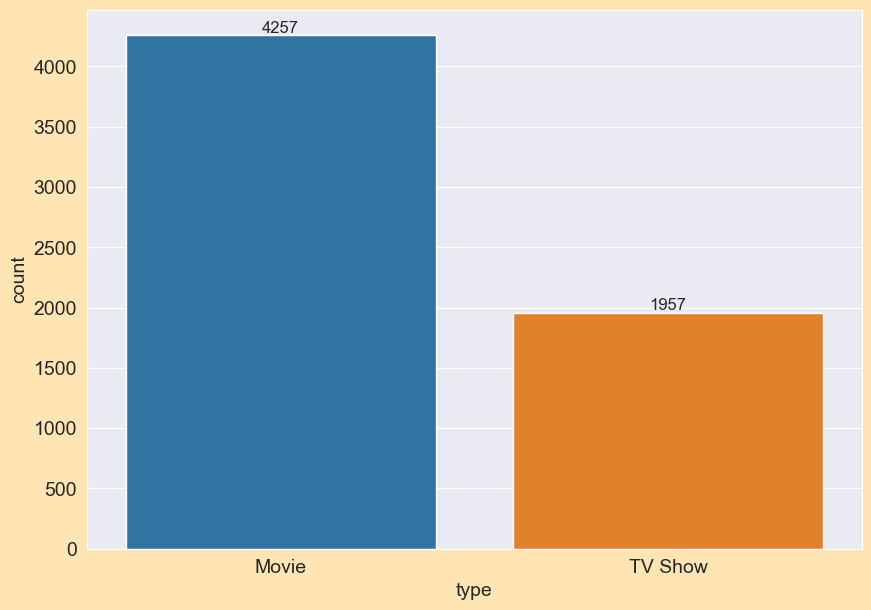

In [25]:
cf = sns.countplot(x='type',data=df)
sns.set(rc={"figure.figsize": (4,4)})
for bars in cf.containers:
    cf.bar_label(bars)

from the above graph, we can see that movie type of content is released more than tv show type of content

# 2 - Most number of contents released in years

In [26]:
df['release_year'].value_counts()

release_year
2018    1062
2017     957
2019     843
2016     828
2015     510
        ... 
1966       1
1959       1
1964       1
1925       1
1963       1
Name: count, Length: 72, dtype: int64

Text(0.5, 1.0, 'Most number of contents released in years')

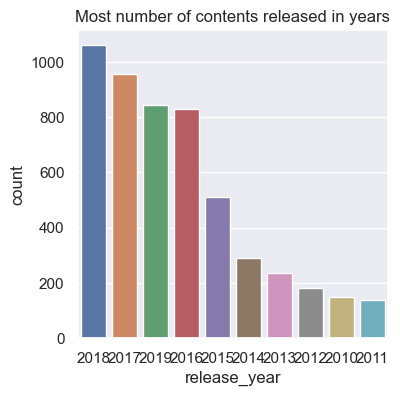

In [27]:
sns.countplot(x="release_year",order= df['release_year'].value_counts().index[0:10],data= df)
plt.title("Most number of contents released in years")

The maximum no. of contents release in 2018.

# 3 - Maximum type of contents mostly released in years

In [28]:
# Creating Dataframs 'type_movies' and 'type_tv_shows'

type_movies = df[df['type']=='Movie']
type_tv_shows = df[df["type"]=="TV Show"]

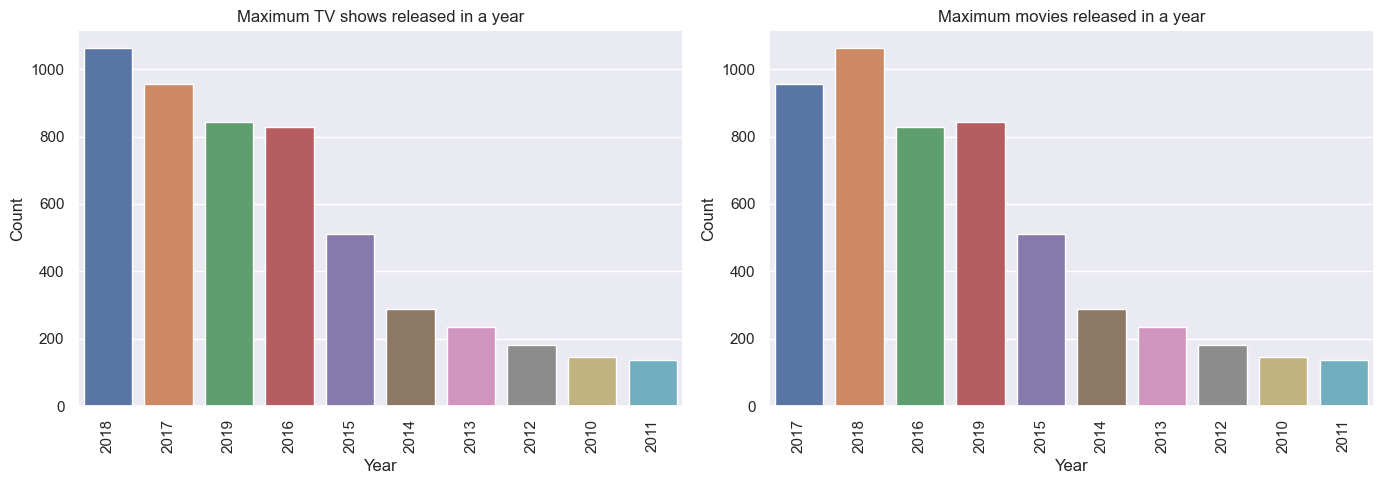

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First subplot for TV shows
sns.countplot(x="release_year", data=df, order=df['release_year'].value_counts().index[0:10], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Maximum TV shows released in a year")
axes[0].set_xlabel('Year')
axes[0].set_ylabel("Count")

# Create a second subplot for movies
sns.countplot(x="release_year", order=type_movies["release_year"].value_counts().index[0:10], data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Maximum movies released in a year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

from above we can see that both movies and tv shows are mostly released in 2018

# 4 - Countries with maximum number of contents released

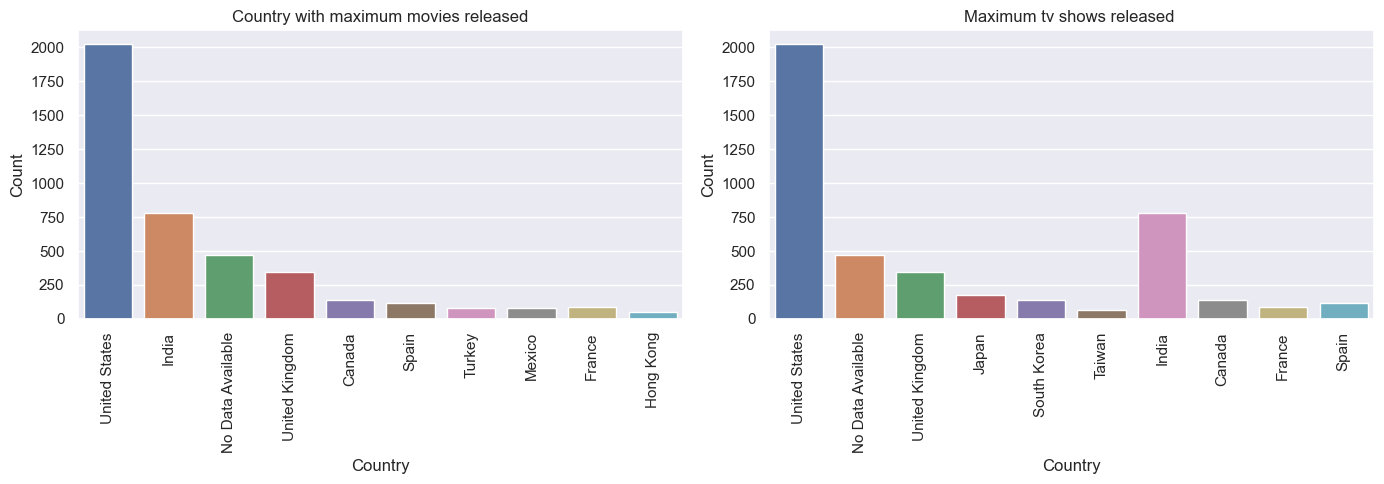

In [30]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='country',data = df, order = type_movies['country'].value_counts().index[0:10],ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Country with maximum movies released")
axes[0].set_xlabel('Country')
axes[0].set_ylabel("Count")


sns.countplot(x="country", order=type_tv_shows["country"].value_counts().index[0:10], data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Maximum tv shows released ")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

from above, we can see that maximum contents released in united states, indea and united kingdom

# 5 - Top 10 contents Ratings

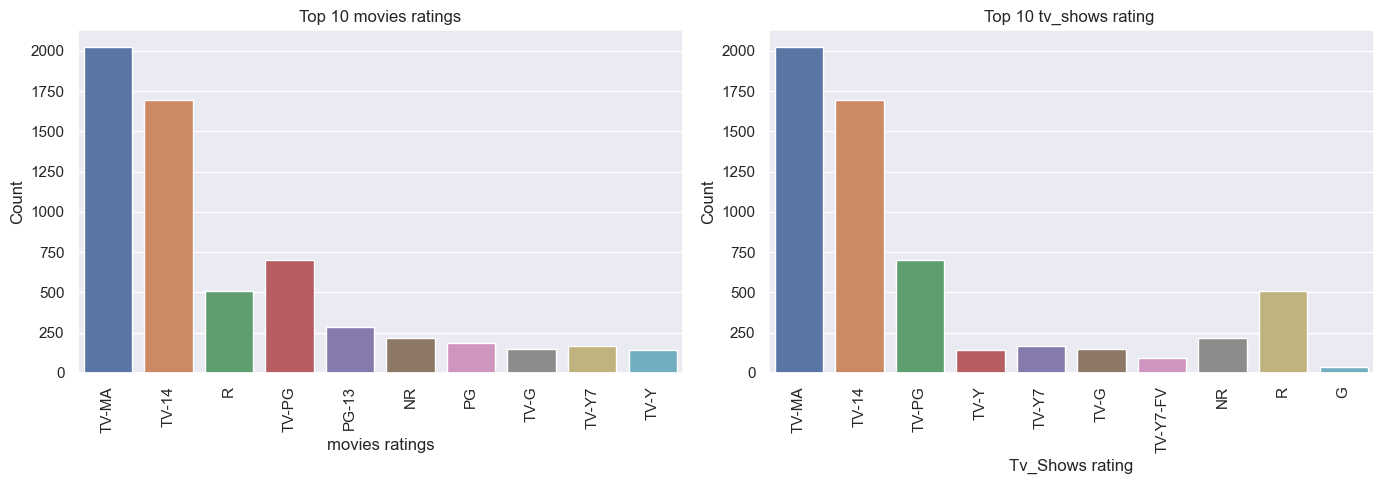

In [31]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='rating',data = df, order = type_movies['rating'].value_counts().index[0:10],ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Top 10 movies ratings")
axes[0].set_xlabel('movies ratings')
axes[0].set_ylabel("Count")


sns.countplot(x="rating", order=type_tv_shows["rating"].value_counts().index[0:10], data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Top 10 tv_shows rating ")
axes[1].set_xlabel("Tv_Shows rating")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

- from the above we can see that for tv shows, the top ratings are TV_MA,TV-14,TV-PG.and R
- from the above we can see that for movies the top ratings are TV-MA ,TV-14,TV- PG, R
- TV- MA rating is top for both type of contents, so below 18 years of age should not watch
- TV-14 second rating for the contents and this contents are mainly for over 14 years of age 
- below 14 age of chhildren is not recommended to watch without patental guidence 
- rating R which means restricted movies and it is highly prohibited for under 18 years of age

# 6 - Top 10 Directors

In [32]:
df['director'].value_counts().head(10)

director
No Data Available         1955
Raúl Campos, Jan Suter      18
Marcus Raboy                14
Jay Karas                   13
Jay Chapman                 12
Martin Scorsese              9
Steven Spielberg             9
Johnnie To                   8
Lance Bangs                  8
David Dhawan                 8
Name: count, dtype: int64

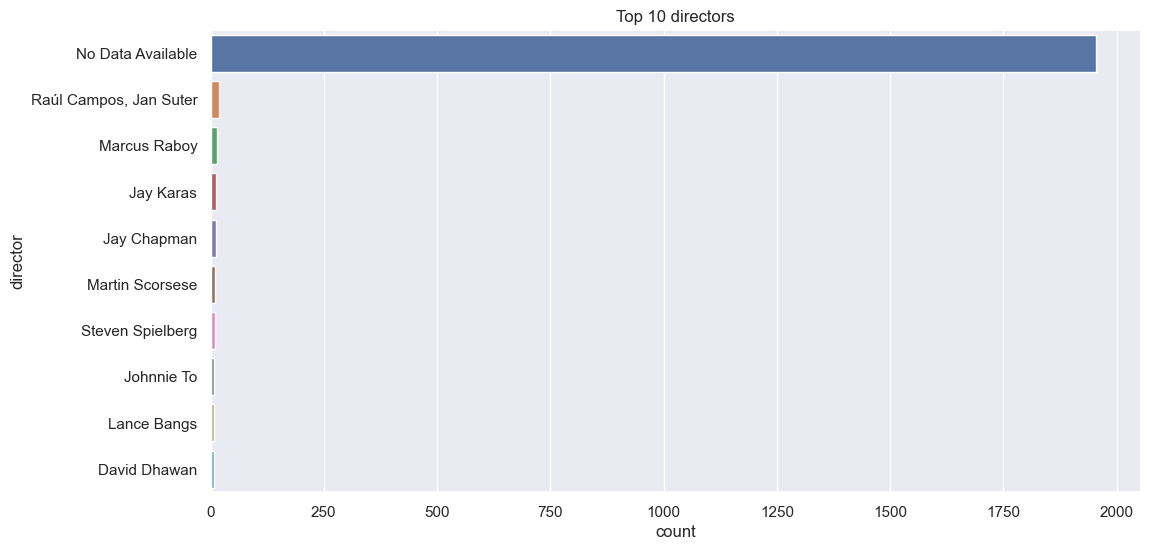

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(y="director",order=df['director'].value_counts().index[0:10],data=df)
plt.title("Top 10 directors")
plt.show()

from the above top directors are raul campos and jan suter

# 7 - Top 10 Genres on Netflix

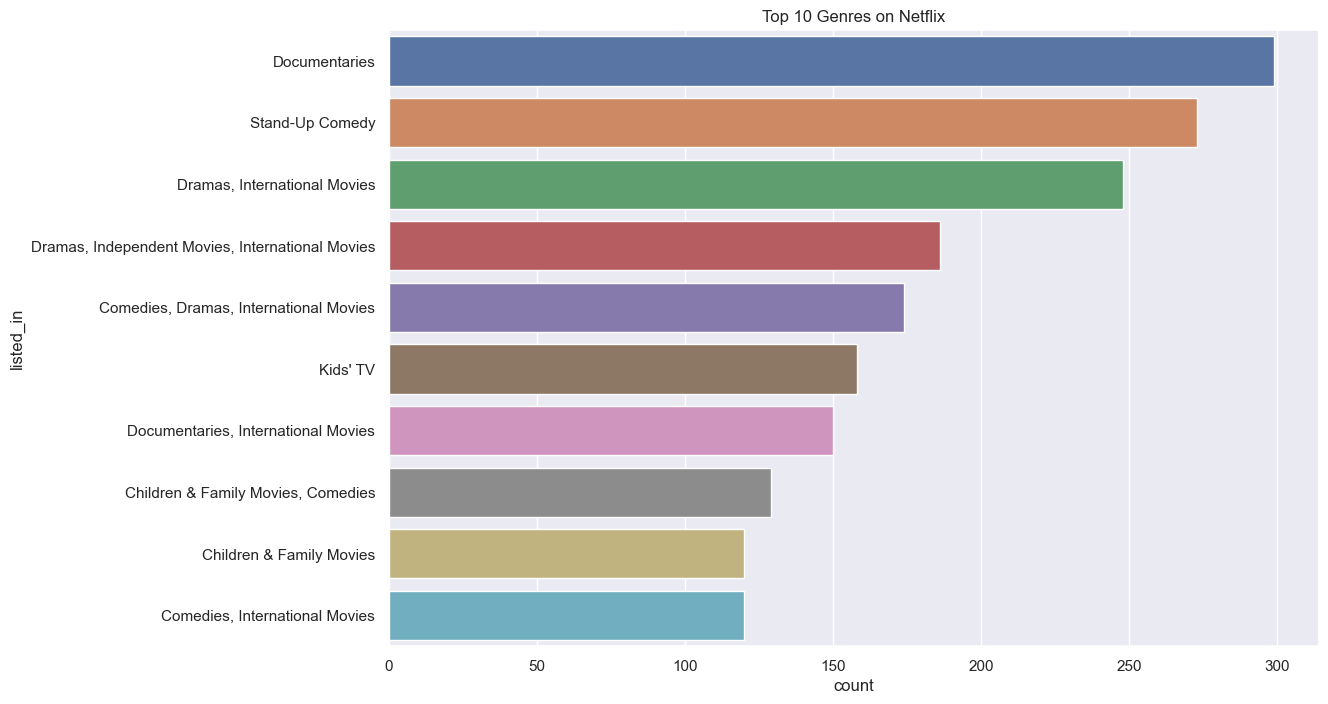

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(y="listed_in",order = df['listed_in'].value_counts().index[0:10],data = df)
plt.title("Top 10 Genres on Netflix")
plt.show()

from above plot we can see that the top genere on netflix are Documentaries, stand-up comedy , dramas, and international movies

# 8 - Most popular content's genre

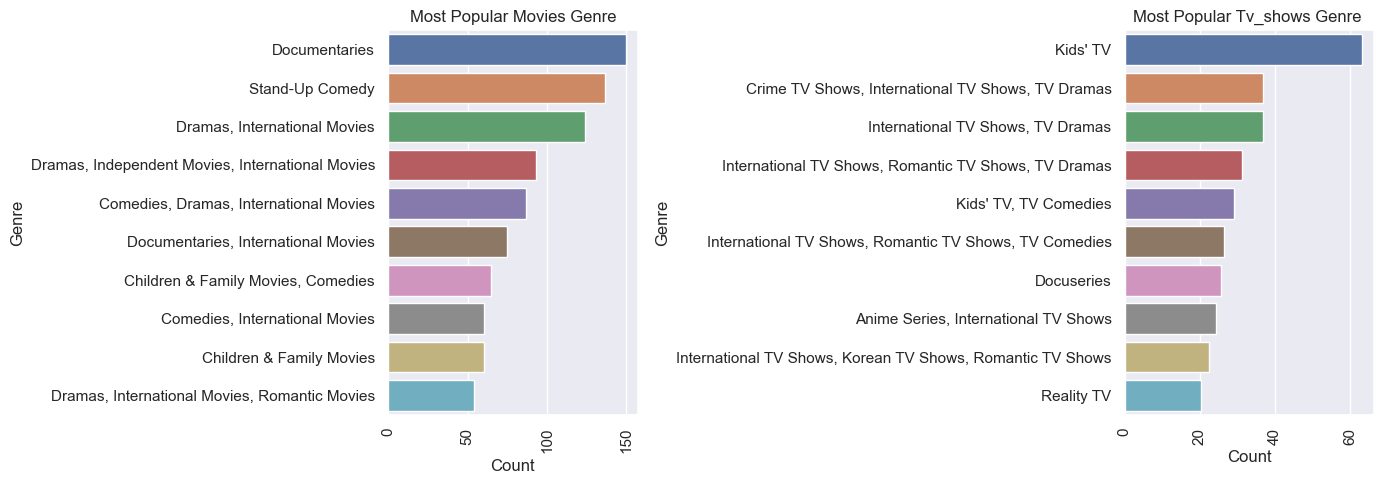

In [50]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.countplot(y='listed_in',data = df, order = type_movies['listed_in'].value_counts().index[0:10],ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Most Popular Movies Genre")
axes[0].set_xlabel('Count')
axes[0].set_ylabel("Genre")


sns.countplot(y="listed_in", order=type_tv_shows["listed_in"].value_counts().index[0:10], data=df, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Most Popular Tv_shows Genre ")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Genre")
plt.tight_layout()
plt.show()

- from the above plot we can see for Tv shows, the most popular genre is Kid's Tv 
- and for movies, the most pupular genre are Documentaries , Stand - up comedy, Dramas and International movies

# 9 - Maximum anad minimum duration of movies

In [52]:
df[['Minutes','Unit']] = df['duration'].str.split(" ",expand=True) 

In [54]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages,Minutes,Unit
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,Older Kids,90,min
1,80117401,Movie,Jandino: Whatever it Takes,No Data Available,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9,Adults,94,min
2,70234439,TV Show,Transformers Prime,No Data Available,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9,Older Kids,1,Season
3,80058654,TV Show,Transformers: Robots in Disguise,No Data Available,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9,Older Kids,1,Season
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9,Teens,99,min


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6214 entries, 0 to 6222
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6214 non-null   int64         
 1   type          6214 non-null   object        
 2   title         6214 non-null   object        
 3   director      6214 non-null   object        
 4   cast          6214 non-null   object        
 5   country       6214 non-null   object        
 6   date_added    5574 non-null   datetime64[ns]
 7   release_year  6214 non-null   int64         
 8   rating        6214 non-null   object        
 9   duration      6214 non-null   object        
 10  listed_in     6214 non-null   object        
 11  description   6214 non-null   object        
 12  year          6214 non-null   int32         
 13  month         6214 non-null   int32         
 14  ratings_ages  6214 non-null   object        
 15  Minutes       6214 non-null   object       

the minutes column is object and we have to convert into numeric

In [56]:
df['Minutes'] = pd.to_numeric(df['Minutes'],errors='coerce')
df['Minutes'].max()

312

In [57]:
df['Minutes'].min()

1

In [58]:
df[(df['type']=='Movie') & (df['Minutes']==312)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,ratings_ages,Minutes,Unit
4315,80988062,Movie,Black Mirror: Bandersnatch,No Data Available,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,12,Adults,312,min


as we can see the maximum duration of movie is 312 minute and the minimum duration is 1 minute 

# Conclusion


- more number of movies are released as compared to Tv shows in netflix.
- In 2018, maximum number of contents released.
- Top Directore's are raul campos and jan suter
- Top contries where maximum contents released are United State , India and United kingdom
- TV-MA & TV-14 are the top rating for both type of contents 
- Most popular Genre on netflix are Documentaries, stand-up comedy , dramas, and international movies
- lognest duration of movies is 312 and shortest is 1 minute
- Black Mirror Bandematch is the longest duration moive.